In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned stats
nta_cleaned = pd.read_csv("data/nta_fine_stats_cleaned.csv")

# Load for choropleth
geo_merged = gpd.read_file("data/nta_with_fine_stats.geojson")


## 📈 Cell 6: Visualize Top 10 Neighborhoods by Fine Density
This creates a horizontal bar chart using Seaborn, showing the top 10 NYC neighborhoods with the most fines per 1,000 people.
It helps communicate which areas have the most intense fine activity relative to population.

/var/folders/0q/x2dyyz5d7xs7zzrfhj8l86840000gp/T/ipykernel_84215/2225916080.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='fines_per_1000', y='ntaname', palette='viridis')


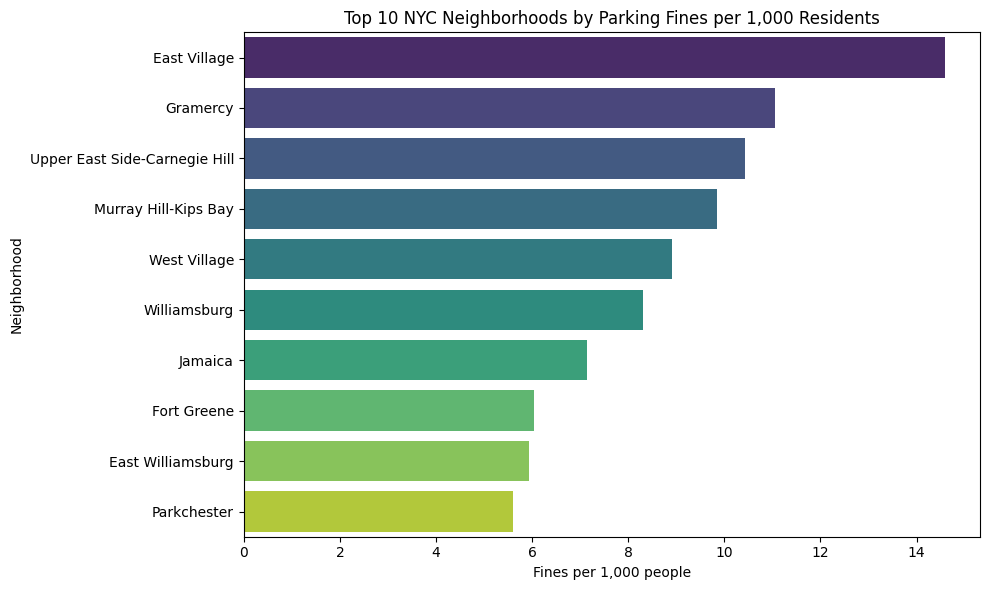

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

top10 = nta_cleaned.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top10, x='fines_per_1000', y='ntaname', palette='viridis')
plt.title("Top 10 NYC Neighborhoods by Parking Fines per 1,000 Residents")
plt.xlabel("Fines per 1,000 people")
plt.ylabel("Neighborhood")
plt.tight_layout()
plt.show()


## 🗺️ Cell 7: Choropleth Map of Fines per 1,000 People
Finally, we merge the fine statistics back into the original GeoJSON file and use GeoPandas to generate a choropleth map of NYC.
Neighborhoods are colored by the number of fines per 1,000 people, creating an intuitive, visual overview of fine intensity across the city.

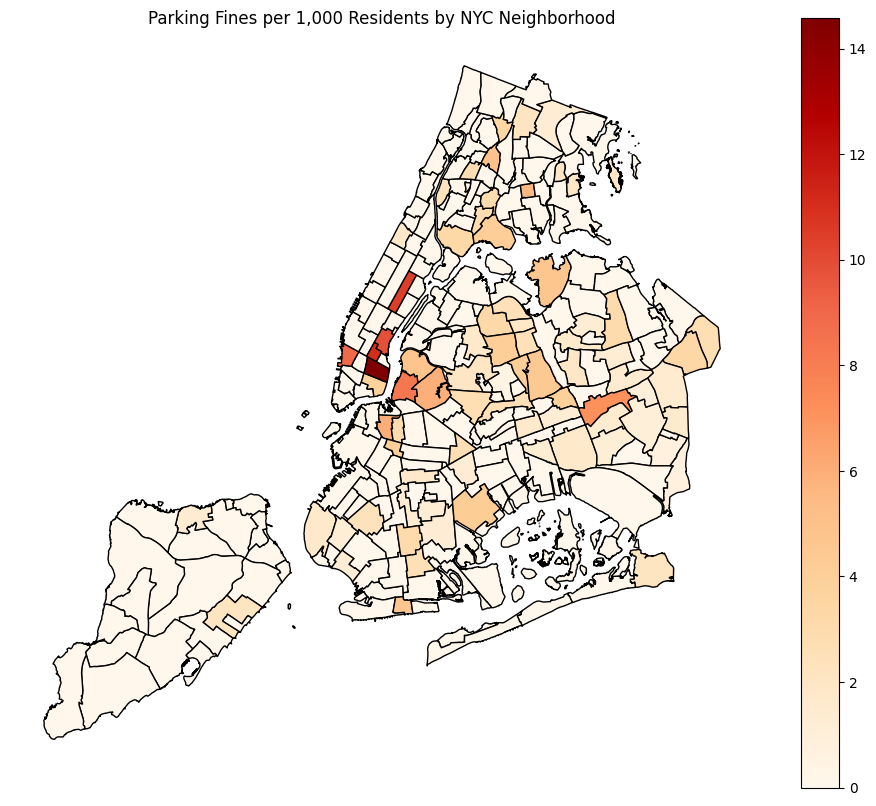

In [5]:
geo_merged['fines_per_1000'] = geo_merged['fines_per_1000'].fillna(0)

# Plot map
geo_merged.plot(
    column='fines_per_1000',
    cmap='OrRd',
    legend=True,
    figsize=(12, 10),
    edgecolor='black'
)
plt.title("Parking Fines per 1,000 Residents by NYC Neighborhood")
plt.axis('off')
plt.show()
